In [1]:
%load_ext autoreload

In [2]:
    
%autoreload 2

## imports

In [1]:
import awswrangler as wr
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

sns.set_theme()

import itertools 
# import matplotlib.gridspec as gridspec

from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange

import warnings
warnings.filterwarnings('ignore')
import json
# from tsai.all import *
from IPython.display import display, Markdown
import json
# from pandas.io.json import json_normalize

from matplotlib.patches import Patch

import matplotlib.dates as mdates

from helper_functions.data_readers import *

from helper_functions.aggregations import *

In [52]:
import math

In [45]:
import scipy.stats as st

In [2]:

# import matplotlib.ticker as ticker

## helper functions

In [3]:
colors = sns.color_palette(['#184EAD','#648fff','#88ccee','#ae9ef7','#6844d5','#332288','#c52dac','#ef4341','#84164c','#cb6577','#ff6100','#90550f','#c78d1b','#ffb003','#ddcc77','#a2c662','#40a018','#117347','#43aa99'])

In [4]:
# color_list = ['#184EAD','#648fff','#88ccee','#ae9ef7','#6844d5','#332288','#c52dac','#ef4341','#84164c','#cb6577','#ff6100','#90550f','#c78d1b','#ffb003','#ddcc77','#a2c662','#40a018','#117347','#43aa99']

In [5]:
%matplotlib inline
def show_color_pallete():
# fig, ax = plt.subplots()
    color_list = ['#184EAD','#648fff','#88ccee','#ae9ef7','#6844d5','#332288','#c52dac','#ef4341','#84164c','#cb6577','#ff6100','#90550f','#c78d1b','#ffb003','#ddcc77','#a2c662','#40a018','#117347','#43aa99']
    sns.palplot(color_list, size=2)
    ax = plt.gca()
    for i, name in enumerate(color_list):
        label = f'[{i}] {name}'
        ax.text(i, -.57, label,horizontalalignment='center', fontsize = 10) 
    plt.show()

## Reading in Data

In [6]:
# ST Patrick Trips
StPatrick1data = get_data(boat = 'stpatrick', trip_no = 0)
StPatrick2data = get_data(boat = 'stpatrick', trip_no = 1)
StPatrick3data = get_data(boat = 'stpatrick', trip_no = 2)

counts_StPatrick1 = StPatrick1data['all_counts']
counts_StPatrick2 = StPatrick2data['all_counts']
counts_StPatrick3 = StPatrick3data['all_counts']

stpatrick1_elog = StPatrick1data['elogs']
stpatrick2_elog = StPatrick2data['elogs']
stpatrick3_elog = StPatrick3data['elogs']


stpatrick1_bv_sets = StPatrick1data['bv_set_counts']
stpatrick2_bv_sets = StPatrick2data['bv_set_counts']
stpatrick3_bv_sets = StPatrick3data['bv_set_counts']

{'trip_id': 'stpatrick_2024-01-03', 'trip_start_date': '2024-01-03', 'trip_end_date': '2024-01-28'}
{'trip_id': 'stpatrick_2024-02-03', 'trip_start_date': '2024-02-03', 'trip_end_date': '2024-02-28'}
{'trip_id': 'stpatrick_2024-03-08', 'trip_start_date': '2024-03-08', 'trip_end_date': '2024-04-06'}


In [7]:
# Brancol Trips
Brancol1data = get_data(boat = 'brancol', trip_no = 0)
Brancol2data = get_data(boat = 'brancol', trip_no = 1)
Brancol3data = get_data(boat = 'brancol', trip_no = 2)


counts_Brancol1 = Brancol1data['all_counts']
counts_Brancol2 = Brancol2data['all_counts']
counts_Brancol3 = Brancol3data['all_counts']

brancol1_elog = Brancol1data['elogs']
brancol2_elog = Brancol2data['elogs']
brancol3_elog = Brancol3data['elogs']

brancol1_bv_sets = Brancol1data['bv_set_counts']
brancol2_bv_sets = Brancol2data['bv_set_counts']
brancol3_bv_sets = Brancol3data['bv_set_counts']


brancol1trip = Brancol1data['trip_info']
brancol2trip = Brancol2data['trip_info']
brancol3trip = Brancol3data['trip_info']

{'trip_id': 'brancol_2024-01-05', 'trip_start_date': '2024-01-05', 'trip_end_date': '2024-01-26'}
{'trip_id': 'brancol_2024-02-03', 'trip_start_date': '2024-02-03', 'trip_end_date': '2024-02-26'}
{'trip_id': 'brancol_2024-03-05', 'trip_start_date': '2024-03-05', 'trip_end_date': '2024-04-01'}


##### 

## Sets & Counts Plot

# Elog Comparisons

##### helper functions

In [8]:
# def plot_hlines(ax, df, y_val, start_col, end_col, width, color, label):
#     ax.hlines(
#         y = np.full(len(df), y_val),
#         xmin = df[start_col].values.reshape((-1,1)),
#         xmax =df[end_col].values.reshape((-1,1)),
#         linewidth = width,colors= color, label = label
#     )

# def plot_set_hlines(ax, df, source, color_dict):
#     if source == 'elog':
#         set_start_col = 'systemstartsetdatetime'
#         set_end_col = 'systemendsetdatetime'
#         haul_start_col = 'systemstarthauldatetime'
#         haul_end_col = 'systemendhauldatetime'
#         y_val = 1


#     elif source == 'bv':
#         set_start_col = 'set_start_datetime'
#         set_end_col = 'set_end_datetime'
#         haul_start_col = 'haul_start_datetime'
#         haul_end_col = 'haul_end_datetime'
#         y_val = 0
    
#     colors = color_dict[source]     
    
    
#     #plot_hauling
#     plot_hlines(ax, df,y_val, haul_start_col, haul_end_col, 12, colors['haul'], 'haul')

#     #plot tweener time
#     plot_hlines(ax, df,y_val, set_end_col, haul_start_col, 12, colors['between'], 'mid')

#     #plot setting
#     plot_hlines(ax, df, y_val,  set_start_col, set_end_col, 12, colors['set'], 'set')


# def annotate_counts(ax, df, count_col, x_col, y_value):
#     props = dict(boxstyle='round', facecolor='white', alpha=0.35)
#     for idx, row in df.iterrows():
#         text = f'count: {row[count_col]}'
#         x_value = row[x_col]
#         ax.text( x_value,y_value , text, fontsize=10, horizontalalignment='right', bbox=props)
    
    
#     # ax.text(.02, .9, f'r2={rvalue ** 2:.2f}, p={pvalue:.2g}, rmse={rmse:.2f}', transform=ax.transAxes)    

In [12]:
def plot_set_bars(ax, df, source, color_dict):
    if source == 'elog':
        set_start_col = 'systemstartsetdatetime'
        set_end_col = 'systemendsetdatetime'
        haul_start_col = 'systemstarthauldatetime'
        haul_end_col = 'systemendhauldatetime'
        y_val = 1.7
        
    elif source == 'bv':
        set_start_col = 'set_start_datetime'
        set_end_col = 'set_end_datetime'
        haul_start_col = 'haul_start_datetime'
        haul_end_col = 'haul_end_datetime'
        y_val = .7

    df['set_duration'] = df[set_end_col] - df[set_start_col]
    df['haul_duration'] = df[haul_end_col] - df[haul_start_col]
    df['mid_duration'] = df[haul_start_col] - df[set_end_col]
    
    set_x = list(zip(df[set_start_col], df['set_duration']))
    haul_x = list(zip(df[haul_start_col], df['haul_duration']))
    mid_x = list(zip(df[set_end_col], df['mid_duration']))
    
    y = (y_val, .6)

    colors = color_dict[source]
    ax.broken_barh(mid_x, y, facecolors = colors['mid'], edgecolor = 'face')
    ax.broken_barh(haul_x, y, facecolors = colors['haul'], edgecolor = 'face')
    ax.broken_barh(set_x, y, facecolors = colors['set'], edgecolor = 'face')
    

In [10]:
def plot_elog_comparisons(ax, dfElog, dfBV, title, legend = True, annotate_counts = False, display_axis= True):

    # ax[0].autofmt_xdate()

    
    ax.set_yticks([1,2],('actual','elogs'))
    # ax.set_yticks([0,1,2],('bv','elogs',' '))
    fig.suptitle(titles['main'], fontsize = 20)
    
    # df1 = brancol1_elog
    # df1sets =brancol1_bv_sets

    

    if annotate_counts:
        dfElog['totalcount'] = dfElog['bycatchcount'].astype(int) + dfElog['catchcount'].astype(int)
        dfBV['retained_count'] = dfBV['retained_count'].astype('Int64')
        annotate_counts(ax, dfElog, 'totalcount', 'systemstarthauldatetime', 1.2)
        annotate_counts(ax, dfBV, 'retained_count', 'haul_start_datetime', 0.2)
   

    plot_set_bars(ax, dfElog, 'elog', color_dict)
    plot_set_bars(ax, dfBV, 'bv', color_dict)

 

    ax.set_title(title,x = .1, y = 1, fontsize = 9)
    
    # ax.autoscale()
    # ax[0].set_ylim(-.5,1.5)
    # ax[0].tick_params(axis='x', labelrotation=45)

    if legend:
        legend_elements = []
        for label, color in color_dict['elog'].items():
            
            legend_elements.append(Patch(facecolor=color, edgecolor=color,
                             label=label))
        ax.legend(handles = legend_elements, loc='center', bbox_to_anchor=(1.08, 1.1), ncol = 1, fontsize = 12)

    
    #use consise date formater

    if display_axis:
        locator = DayLocator()
        formatter = mdates.ConciseDateFormatter(locator)
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)

    # ax.set_ylim(-.6,1.6)

#### plot

In [8]:
color_dict = {
    'bv': {'set':'#40a018', 'mid':'#a2c662', 'haul':'#117347', },
    'elog': {'set':'#40a018', 'mid':'#a2c662', 'haul':'#117347'},
    # 'elog':{'set':'#648fff', 'haul':'#184EAD', 'mid':'#88ccee'}
}

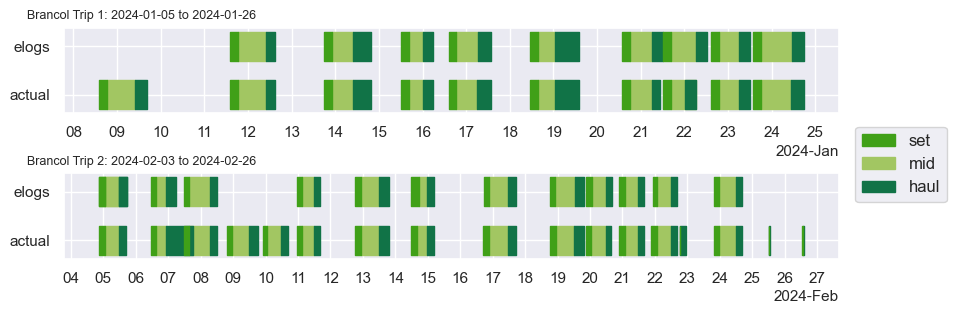

In [13]:
df1 = brancol1_elog
df1sets =brancol1_bv_sets
trip1 = Brancol1data['trip_info']

df2 = brancol2_elog
df2sets = brancol2_bv_sets
trip2 = Brancol2data['trip_info']

trip1title = f'Brancol Trip 1: {trip1['trip_start_date']} to {trip1['trip_end_date']}'
trip2title = f'Brancol Trip 2: {trip2['trip_start_date']} to {trip2['trip_end_date']}'

titles = {'main':'', 'plot1':trip1title, 'plot2':trip2title}

fig, ax = plt.subplots(2,1, figsize=(10,3))
# fig.tight_layout(pad=4.0)
plot_elog_comparisons(ax[0], df1, df1sets, trip1title, legend = False)
plot_elog_comparisons(ax[1], df2, df2sets, trip2title, legend = True)
plt.subplots_adjust(hspace=.7)
plt.savefig('elog_comparisons_brancol.png', bbox_inches='tight')

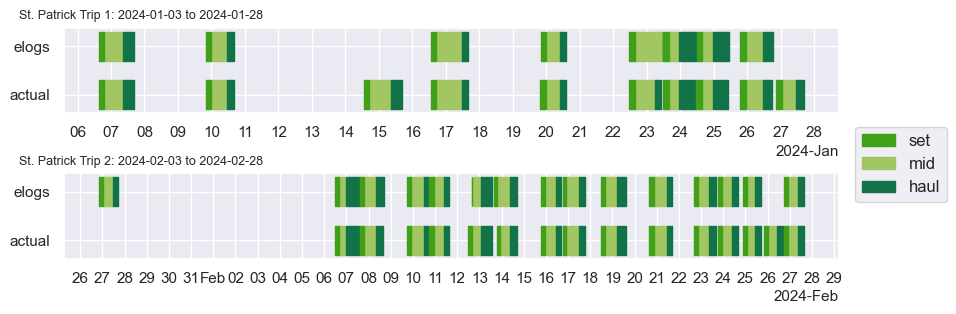

In [14]:
df1 = stpatrick1_elog
df1sets =stpatrick1_bv_sets
trip1 = StPatrick1data['trip_info']

df2 = stpatrick2_elog
df2sets = stpatrick2_bv_sets
trip2 = StPatrick2data['trip_info']

trip1title = f'St. Patrick Trip 1: {trip1['trip_start_date']} to {trip1['trip_end_date']}'
trip2title = f'St. Patrick Trip 2: {trip2['trip_start_date']} to {trip2['trip_end_date']}'

titles = {'main':'', 'plot1':trip1title, 'plot2':trip2title}

fig, ax = plt.subplots(2,1, figsize=(10,3))
# fig.tight_layout(pad=4.0)
plot_elog_comparisons(ax[0], df1, df1sets, trip1title, legend = False)
plot_elog_comparisons(ax[1], df2, df2sets, trip2title, legend = True)
plt.subplots_adjust(hspace=.7)
plt.savefig('elog_comparisons_stpatrick.png',bbox_inches='tight')

In [15]:
# one of the elog sets was accidentally recorded in another trip, move the set to the intended trip to compare

In [16]:
stpatrick2_elog.sort_values(by = 'systemstartsetdatetime', inplace = True)

missing_set = stpatrick2_elog.sort_values(by = 'systemstartsetdatetime').iloc[[0]]

stpatrick2_elog.drop(stpatrick2_elog.index[0], axis = 0, inplace = True)

stpatrick1_elog = pd.concat([stpatrick1_elog, missing_set])

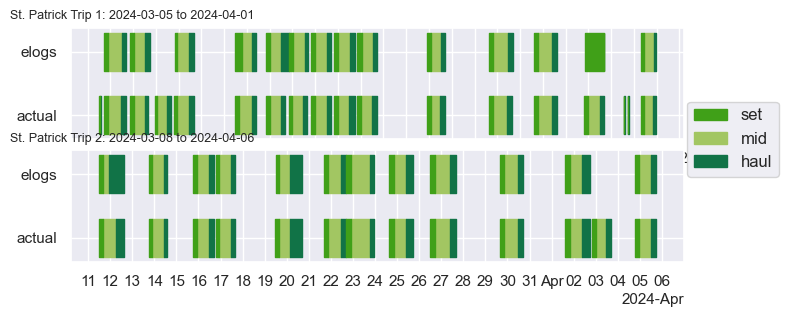

In [17]:
df1 = brancol3_elog
df1sets =brancol3_bv_sets
trip1 = Brancol3data['trip_info']

df2 = stpatrick3_elog
df2sets = stpatrick3_bv_sets
trip2 = StPatrick3data['trip_info']

trip1title = f'St. Patrick Trip 1: {trip1['trip_start_date']} to {trip1['trip_end_date']}'
trip2title = f'St. Patrick Trip 2: {trip2['trip_start_date']} to {trip2['trip_end_date']}'

titles = {'main':'', 'plot1':trip1title, 'plot2':trip2title}

fig, ax = plt.subplots(2,1, figsize=(8,4))
fig.tight_layout(pad=4.0)
plot_elog_comparisons(ax[0], df1, df1sets, trip1title, legend = False)
plot_elog_comparisons(ax[1], df2, df2sets, trip2title, legend = True)
plt.subplots_adjust(wspace=0, hspace=.1)

In [26]:
# a type discovered in BV notes, mix up of AM and PM, changing ot intended value
brancol2_bv_sets_adjusted = brancol2_bv_sets.copy()

brancol2_bv_sets_adjusted.loc[brancol2_bv_sets_adjusted['set_number'] == '2','haul_end_datetime'] = brancol2_bv_sets_adjusted.loc[brancol2_bv_sets_adjusted['set_number'] == '2']['haul_end_datetime'] - pd.to_timedelta('12 hours')




## ELOG / BV delta analysis

##### helper functions

In [18]:
# re adjust time for BV Set

In [19]:
def get_elog_bv_deltas(dfMerged):
    dfMerged['set_start_delta_minutes'] = (dfMerged['systemstartsetdatetime'] - dfMerged['set_start_datetime']).dt.total_seconds()/60
    dfMerged['set_end_delta_minutes'] = (dfMerged['systemendsetdatetime'] - dfMerged['set_end_datetime']).dt.total_seconds()/60
    dfMerged['haul_start_delta_minutes'] = (dfMerged['systemstarthauldatetime'] - dfMerged['haul_start_datetime']).dt.total_seconds()/60
    dfMerged['haul_end_delta_minutes'] = (dfMerged['systemendhauldatetime'] - dfMerged['haul_end_datetime']).dt.total_seconds()/60
    dfMerged['catch_count_delta'] = dfMerged['elog_total_count'] - dfMerged['bv_retained_count'] 



    
    # dfMerged['set_start_delta'].


In [20]:
def merge_bv_elog_sets(dfElog, dfBV, delta = '1 hour'):
    dfElog.sort_values(by = 'systemstartsetdatetime', inplace = True)
    dfBV.sort_values(by = 'set_start_datetime', inplace = True)
    elog_columns = ['id','bycatchcount', 'catchcount','systemstartsetdatetime','systemendsetdatetime','systemstarthauldatetime','systemendhauldatetime']
    bv_columns = ['set_number','set_start_datetime','set_end_datetime', 'haul_start_datetime','haul_end_datetime', 'retained_count']
    dfMerged = pd.merge_asof(dfElog[elog_columns], dfBV[bv_columns], left_on = 'systemstartsetdatetime', right_on = 'set_start_datetime', tolerance=pd.Timedelta(delta), direction = 'nearest')

    col_order = ['id','set_number', 
             'bycatchcount', 'catchcount', 
                 'retained_count',
             'systemstartsetdatetime','set_start_datetime',
             'systemendsetdatetime',   'set_end_datetime',
             'systemstarthauldatetime', 'haul_start_datetime',
             'systemendhauldatetime',  'haul_end_datetime']
    dfMerged = dfMerged[col_order]
    
  

    dfMerged.rename(columns = {'retained_count':'bv_retained_count','catchcount':'elog_target_count','bycatchcount':'elog_bycatch_count'}, inplace = True)

    dfMerged['elog_total_count'] = dfMerged['elog_target_count'].astype(int) + dfMerged['elog_bycatch_count'].astype(int)

    get_elog_bv_deltas(dfMerged)
    
    return dfMerged

In [21]:
def get_combined_delta_means(dfs):
    delta_cols = ['set_start_delta_minutes','set_end_delta_minutes','haul_start_delta_minutes','haul_end_delta_minutes']
    for col in delta_cols:
        combined_list = []
        for df in dfs:
            df_list = df[col].abs().to_list()
            combined_list = combined_list + df_list
        # print(combined_list)
        avg = np.mean(combined_list)
        # print(stats.describe(combined_list))
        
            
        print(f'{col} Mean: {avg} min | Min: {np.min(combined_list)} | Max: {np.max(combined_list)}')
        q = [10,25,50,75,80,90]
        percentile_str = ''
        percentiles = np.percentile(combined_list, q = q)
        for p, percentile in zip(q, percentiles):
            percentile_str +=  f'\033[1m{p}%:\033[0m {percentile} '
        print(percentile_str) 
        print(' ')
    # print(f'number of logged sets: {len(combined_list)}')

In [22]:
def get_delta_means(dfMerged):
    delta_cols = ['set_start_delta_minutes','set_end_delta_minutes','haul_start_delta_minutes','haul_end_delta_minutes']
    for col in delta_cols:
        avg = np.mean(dfMerged[col].abs())
        print(f'{col}: {avg} min')

In [23]:
def get_combined_deltas(dfs):
    deltas = {}
    delta_cols = ['set_start_delta_minutes','set_end_delta_minutes','haul_start_delta_minutes','haul_end_delta_minutes']
    for col in delta_cols:
        combined_list = []
        for df in dfs:
            df_list = df[col].abs().to_list()
            combined_list = combined_list + df_list
        # print(combined_list)
        deltas[col] = combined_list

    return deltas
    # print(f'number of logged sets: {len(combined_list)}')

In [24]:
def get_combined_catch_deltas(dfs):
    col = 'catch_count_delta'
    delta_list = []
    for df in dfs:
        df_list = df[col].to_list()
        delta_list = delta_list + df_list
    return delta_list

##### merge elogs and BV sets for comparison

In [27]:
dfBrancol1_merged = merge_bv_elog_sets(brancol1_elog, brancol1_bv_sets)
dfBrancol2_merged = merge_bv_elog_sets(brancol2_elog, brancol2_bv_sets_adjusted, '2 hours')
dfBrancol3_merged = merge_bv_elog_sets(brancol3_elog, brancol3_bv_sets, '2 hours')

dfStPatrick1_merged = merge_bv_elog_sets(stpatrick1_elog, stpatrick1_bv_sets, '2 hours')
dfStPatrick2_merged = merge_bv_elog_sets(stpatrick2_elog, stpatrick2_bv_sets, '5 hours')
dfStPatrick3_merged = merge_bv_elog_sets(stpatrick3_elog, stpatrick3_bv_sets, '2 hours')

### Time deltas

In [28]:
all_merged_dfs = [dfBrancol1_merged, dfBrancol2_merged,dfBrancol3_merged, dfStPatrick1_merged, dfStPatrick2_merged, dfStPatrick3_merged]

In [29]:

get_combined_delta_means([dfBrancol1_merged, dfBrancol2_merged,dfBrancol3_merged, dfStPatrick1_merged, dfStPatrick2_merged, dfStPatrick3_merged])

set_start_delta_minutes Mean: 11.234437858215962 min | Min: 0.0072233666666666665 | Max: 266.2005410666667
10%: 0.2539853166666667 25%: 0.43838930000000004 50%: 0.88410135 75%: 3.060027541666667 80%: 4.525279433333334 90%: 8.83515245 
 
set_end_delta_minutes Mean: 25.786145313145543 min | Min: 0.0066082833333333335 | Max: 1012.98066035
10%: 0.12344418333333333 25%: 0.3762135333333333 50%: 0.8571148333333334 75%: 3.373896525 80%: 3.6812048666666666 90%: 32.63622016666667 
 
haul_start_delta_minutes Mean: 22.37216833826291 min | Min: 0.01893868333333333 | Max: 434.01037583333334
10%: 0.27466523333333337 25%: 0.447974325 50%: 1.2010629 75%: 5.3113557 80%: 8.784672033333333 90%: 32.532422833333335 
 
haul_end_delta_minutes Mean: 22.27037762441314 min | Min: 0.03392008333333333 | Max: 730.1382257833334
10%: 0.26356425 25%: 0.6136318666666667 50%: 1.6342256166666667 75%: 7.671325749999999 80%: 10.387698866666666 90%: 34.98451331666667 
 


In [39]:
deltas = get_combined_deltas(all_merged_dfs)


In [40]:
df = pd.DataFrame()
for col, values in deltas.items():
    df_col = pd.DataFrame({'column': np.repeat(col, len(values)), 'value': values})
    df = pd.concat([df, df_col])

label_dict = {'set_start_delta_minutes': 'Set Start', 'set_end_delta_minutes':'Set End', 'haul_start_delta_minutes':'Haul Start', 'haul_end_delta_minutes':'Haul End','catch_count_delta': 'Catch Count' }
df['label'] = df['column'].map(label_dict)

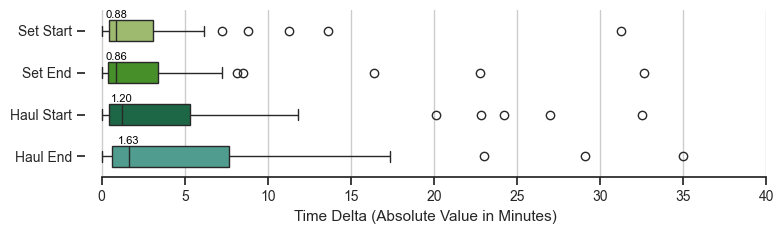

In [41]:
# Create the plot
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(8, 2.5))  # Increased the height to 4 for better spacing
sns.boxplot(y='label', x='value', data=df, hue='label', ax=ax, palette=colors4, width=0.5)
ax.yaxis.label.set_visible(False)
ax.set_xlim(-1, 40)
ax.set_xlabel('Time Delta (Absolute Value in Minutes)', size = 11)

# Calculate medians
medians = df.groupby('label')['value'].median()

# Annotate medians above the boxplots with arrows pointing to the median line
for label in medians.index:
    median_value = medians[label]
    y_pos = df['label'].unique().tolist().index(label)
    ax.annotate(
        f'{median_value:.2f}', 
        xy=(median_value, y_pos), 
        xytext=(median_value, y_pos - 0.25),  # Position the text above the boxplot
        va='bottom', 
        ha='center', 
        color='black', 
        fontsize=8, 
        # fontweight='bold',
        # arrowprops=dict(facecolor='black', edgecolor='black', shrink=0.05, headwidth=5, headlength=5, width=.7),  # Arrow properties
        # bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3')
    )
ax.xaxis.grid(True)
ax.tick_params(axis='x', labelsize=10)  # Change x ticks font size to 12
ax.tick_params(axis='y', labelsize=10)  # Change y ticks font size to 12
# ax.set(ylabel="")
sns.despine(trim=True, 
            left=True
           )
plt.savefig('elog_timedeltas.png', bbox_inches = 'tight', dpi = 150)
plt.tight_layout()
plt.show()

### catch_deltas

In [30]:
catch_deltas = get_combined_catch_deltas(all_merged_dfs)

In [31]:
catch_deltas_inverted = [x*-1 for x in catch_deltas]

In [32]:
avg = np.mean(catch_deltas)

print(f'Mean: {avg} min | Median: {np.median(catch_deltas)} | Min: {np.min(catch_deltas)} | Max: {np.max(catch_deltas)}')
q = [10,25,50,75,80,90]
percentile_str = ''
percentiles = np.percentile(catch_deltas, q = q)
for p, percentile in zip(q, percentiles):
    percentile_str +=  f'\033[1m{p}%:\033[0m {percentile} '
print(percentile_str) 
print(' ')

Mean: -2.0704225352112675 min | Median: -1.0 | Min: -28.0 | Max: 32.0
10%: -8.0 25%: -4.5 50%: -1.0 75%: 0.0 80%: 1.0 90%: 2.0 
 


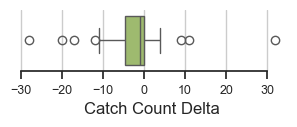

In [33]:
# Create the plot
%matplotlib inline

colors4 = [colors[15], colors[16], colors[17], colors[18]]

sns.set_style("whitegrid", {'axes.grid' : False})
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rc('axes', labelsize = 8)

sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(3.5, .8))  # Increased the height to 4 for better spacing
sns.boxplot( x=catch_deltas,  ax=ax, palette=colors4)
ax.yaxis.label.set_visible(False)
# ax.set_xlim(-30, 30)
ax.set_xlabel('Catch Count Delta')

# Calculate medians
# medians = df.loc[df['column']=='catch_count_delta'].groupby('column')['value'].median()

# Annotate medians above the boxplots with arrows pointing to the median line
# for label in medians.index:
#     median_value = medians[label]
#     y_pos = df['column'].unique().tolist().index(label)
#     ax.annotate(
#         f'Median: {median_value:.0f}', 
#         xy=(0, median_value), 
#         xytext=(0, median_value),  # Position the text above the boxplot
#         va='bottom', 
#         ha='center', 
#         color='black', 
#         fontsize=9, 

#     )


ax.xaxis.grid(True)
ax.tick_params(axis='x', labelsize=9)  # Change x ticks font size to 12
ax.tick_params(axis='y', labelsize=9, left = False)  # Change y ticks font size to 12

sns.despine(trim=True, 
            left=True
           )
plt.savefig('elog_countdeltas2.png', bbox_inches = 'tight', dpi = 150)
plt.tight_layout()


# Vector analysis

#### helper functions

In [71]:
def compare_elog_vector(vectors, df, dfsets, triptitle, rerun = False, figsize = (10, 4), titlesize = 12, lw = .5, ylim = None, markersize = 3):

    fig, ax = plt.subplots(2,1,figsize=figsize, sharex = True, gridspec_kw={'height_ratios': [2, 1]})
    
    sns.lineplot(x = 'datetime', y = 'score', data = vectors, ax = ax[0], marker = "o", markersize = markersize, label = 'Original Vector \n Score', lw = lw)
    if rerun:
        sns.lineplot(x = 'datetime', y = 'rerunscore', data = vectors, ax = ax[0], marker = "o",markersize = markersize, label =  'Point-in-time \n Score', lw = lw)
    plot_elog_comparisons(ax[1], df, dfsets, '', legend = False, display_axis = False)
    locator = DayLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    ax[0].xaxis.set_major_locator(locator)
    ax[0].xaxis.set_major_formatter(formatter)
    ax[0].set_title(triptitle,x = .5, y = 1, fontsize = titlesize)
    # ax[0].set_xticks(locator)
    # plt.tick_params(axis='both', which='both')
    return fig, ax

### sigmoid functions

In [42]:
set_dfs = {'brancol1': brancol1_bv_sets, 'brancol2': brancol2_bv_sets, 'brancol3': brancol3_bv_sets,
           'stpatrick1':stpatrick1_bv_sets, 'stpatrick2': stpatrick2_bv_sets, 'stpatrick3': stpatrick3_bv_sets
          }

set_delta_dfs = []

for trip, df in set_dfs.items():
    df.sort_values(by = 'set_start_datetime', inplace = True)
    df['trip'] = trip
    df['last_haul_end'] = df['haul_end_datetime'].shift(1)
    df['last_haul_delta'] = df['haul_end_datetime']-df['last_haul_end']
    set_delta_dfs.append(df[['trip','set_start_datetime','haul_end_datetime', 'last_haul_end', 'last_haul_delta']])


set_deltas = pd.concat(set_delta_dfs)

set_deltas['last_haul_delta'].describe()

count                           77
mean     1 days 14:47:58.441558441
std      0 days 19:48:23.326176659
min                0 days 04:20:00
25%                1 days 00:02:00
50%                1 days 06:57:00
75%                2 days 00:52:00
max                5 days 00:25:00
Name: last_haul_delta, dtype: object

In [43]:
set_deltas.reset_index(drop=True, inplace=True)

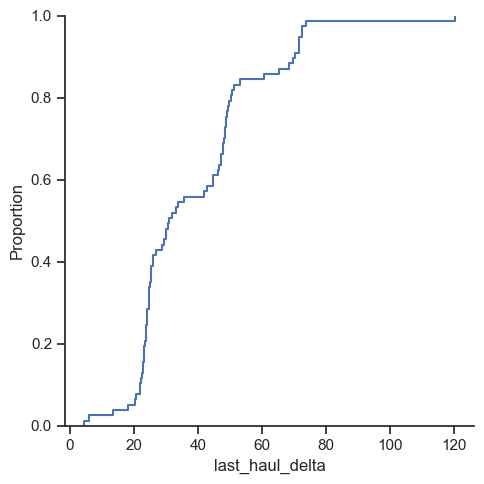

In [44]:
sns.displot(set_deltas["last_haul_delta"]/pd.Timedelta("1 hour"),kind = "ecdf")

In [ ]:
x = (set_deltas["last_haul_delta"]/pd.Timedelta("1 hour")).dropna().sort_values()

params = st.lognorm.fit(x)
# Separate parts of parameters
arg = params[:-2]
loc = params[-2]
scale = params[-1]

In [50]:
# sigmoid function used by Vector 6, time gap vector
def vector_6_algorithim(x):
    k = -0.15;
    b = 60.0;
    return 1.0/(1.0+math.exp(k*(x-b)))

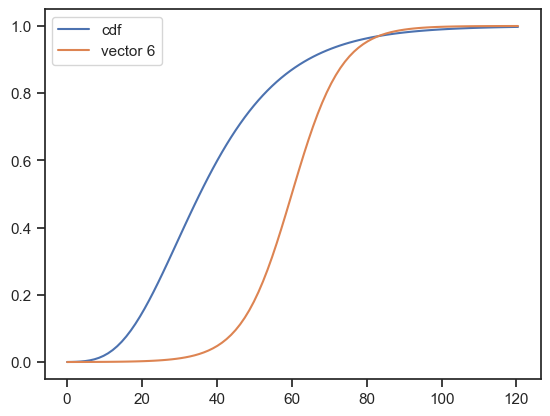

In [56]:
x_data = np.linspace(0, max(x), 100)
cdf = stats.lognorm.cdf(x_data,loc=loc, scale=scale, *arg)
x_vector_6 = [vector_6_algorithim(x_val) for x_val in x_data]
plt.plot(x_data, cdf, label = 'cdf')
plt.plot(x_data,x_vector_6, label = 'vector 6')
plt.legend()
plt.show()


### plotting vector results

In [64]:
vector_rerun_brancol = pd.read_csv('../data/vector_id_6_rerun_brancol.csv')
vector_rerun_brancol['datetime'] = pd.to_datetime(vector_rerun_brancol['datetime'], utc=True)
vector_rerun_brancol['datetime'] = vector_rerun_brancol['datetime'].dt.tz_convert(None)

In [60]:
def get_last_haul_delta(df, set_start_col, haul_end_col):
    df.sort_values(by = set_start_col, inplace = True)
    df['last_haul_end'] = df[haul_end_col].shift(1)
    df['last_haul_delta'] = df[haul_end_col]-df['last_haul_end']



In [73]:
# define trip details
trip = Brancol2data['trip_info']
trip_start_date =pd.to_datetime(trip['trip_start_date'])
trip_end_date = pd.to_datetime(trip['trip_end_date'])

In [76]:
# create dataset of results using cdf function

def most_recent(haul_endings, test):
    return max(haul for haul in haul_endings if haul<=test)
    
# create array of datetime at 4 hr interval
test_intervals= pd.date_range(trip_start_date, trip_end_date, freq = '4h')
haul_endings = brancol2_elog['systemendhauldatetime'].tolist()
haul_endings.append(trip_start_date)

tests = []
for test in test_intervals:
    test_haul = {}
    last_haul = most_recent(haul_endings, test)
    test_haul['test_datetime'] = test
    test_haul['last_haul'] = last_haul
    test_haul['last_haul_delta'] = test - last_haul

    
    tests.append(test_haul)
testsDF = pd.DataFrame(tests) 

x_deltas = testsDF["last_haul_delta"]/pd.Timedelta("1 hour")
cdf = stats.lognorm.cdf(x_deltas, loc=loc, scale=scale, *arg)

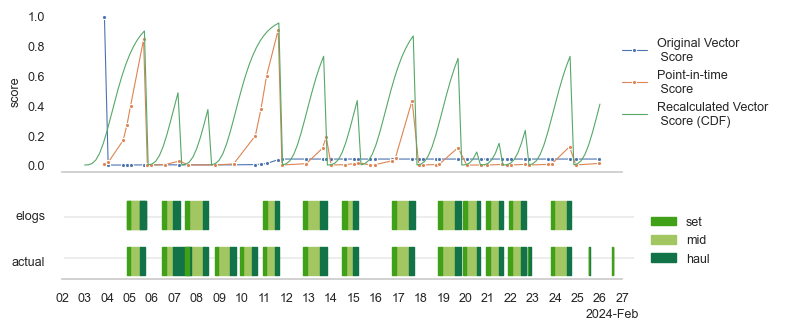

In [77]:


plt.rc('xtick',labelsize=9)
plt.rc('ytick',labelsize=9)

plt.rc('axes', labelsize = 9)
sns.set_style("whitegrid", {'axes.grid' : False})

df = brancol2_elog

get_last_haul_delta(df, 'systemstartsetdatetime', 'systemendhauldatetime')

dfsets =brancol2_bv_sets


mask =  (vector_rerun_brancol['datetime'] > trip_start_date) & (vector_rerun_brancol['datetime'] <= trip_end_date)
vectors =vector_rerun_brancol.loc[mask]
triptitle = r"$\bf{Elog\ Time\ Gap\ Vectors}$ | Brancol Trip 1: " +f'{trip['trip_start_date']} to {trip['trip_end_date']}'


brancol1_fig, brancol1_ax = compare_elog_vector(vectors, df, dfsets, None, rerun = True, figsize = (7.5,3.5),titlesize = 10, lw = .8)
sns.lineplot(x = testsDF['test_datetime'], y = cdf, ax = brancol1_ax[0], label = 'Recalculated Vector \n Score (CDF)', lw = .8)
# brancol1_ax[0].legend().remove()
brancol1_ax[1].hlines([.25, .75],.01,.99, transform=brancol1_ax[1].transAxes, colors = 'grey', lw = .2, zorder = 0)


# plt.subplots_adjust(wspace=0, hspace=.1)
legend_elements = []
for label, color in color_dict['elog'].items():
    
    legend_elements.append(Patch(facecolor=color, edgecolor=color,
                     label=label))

# labels = ['Original vector \n score', 'Point-in-time \n score', 'Recalculated Vector \n Score (CDF)']
brancol1_ax[0].legend( bbox_to_anchor=(.95, .9), ncol = 1, 
                      loc = 'upper left', fontsize = 9, frameon = False)
brancol1_ax[1].legend(handles = legend_elements, bbox_to_anchor=(1, .9), 
                      loc = 'upper left', fontsize = 9, frameon = False
                     )
sns.despine(trim=True, 
            left=True
           )
brancol1_fig.show()
brancol1_fig.savefig('brancol1_elog_vector.png', bbox_inches='tight')

# testsDF.head()

##### other plotting functions

In [23]:
# def plot_event_bars(df, ax,label, datetime_col,duration=None,end_col = None, duration_col = None, y_val=.7, y_height = .6, color= '#43aa99' ):
    
#     if duration:
#         x_duration = np.full(len(df), pd.Timedelta(duration))
#     elif end_col:
#         df['duration'] =  df[end_col]- df[datetime_col]
#         x_duration = df['duration']
#     elif duration_col:
#         x_duration = df[duration_col]
        
#     x = list(zip(df[datetime_col], x_duration))
#     y = (y_val, y_height)

#     ax.broken_barh(x, y, facecolors = color, edgecolor = 'face', label = label, clip_on=False)

    

In [24]:
# def plot_event_vspan(df_events, ax, color_dict):
#     for category, color in color_dict.items():
#         df_category = df_events.loc[df_events['category']==category]
        
#         for idx, row in df_category.iterrows():
#             ax.axvspan(*mdates.date2num([row['start_time'], row['end_time']]), color=color, edgecolor = 'face',alpha=0.5)

In [25]:
# def plot_set_vspan(df_sets, ax, color = '#a2c662'):
#     for idx, row in df_sets.iterrows():
#         ax.axvspan(*mdates.date2num([row['haul_start_datetime'], row['haul_end_datetime']]), color=color, edgecolor = '#40a018',alpha=0.5)

# def get_video_times(vessel, trip_info):
#     trip_start_date = trip_info['trip_start_date']
#     trip_end_date = trip_info['trip_end_date']

#     sql = f"""
#          SELECT 
#             v.start_datetime, 
#             v.cam_name
         
#             from {vessel}_v1_video_files v 
#             where start_datetime > '{trip_start_date}' and start_datetime < '{trip_end_date}'
#     """
#     video_df = wr.athena.read_sql_query(sql, database="tnc_edge")
#     video_df.start_datetime = pd.to_datetime(video_df.start_datetime)
#     video_df['utc_start_datetime'] = video_df['start_datetime'].dt.tz_convert(None)
#     # video_df['utc_end_datetime'] = video_df['utc_start_datetime'] + pd.Timedelta(minutes = 5)
#     return video_df

In [26]:
# def annotate_notes(ax, df, text_col, text_xy = (-60, 30)):
#     arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2", color = 'black')
#     y_var = 20
#     annots = []
#     bbox_args = dict(boxstyle='round', facecolor='black', alpha=0.35)
#     for idx, row in df.iterrows():
#         # y_var = x_vars[n]
#         text = row[text_col]
#         data_xy = (row['start_time'], 1.7)
        
#         an = ax.annotate(
#             text,
#             xy=data_xy, xycoords='data',
#             xytext=text_xy, textcoords='offset points',
#             arrowprops=arrowprops,
#             bbox = bbox_args,
#             color = 'white'
#         )
   
#         annots.append(an)
        
#         x, y = text_xy
        
#         y = y+y_var
#         y_var = y_var * -1
  
#         text_xy = (x,y)

#     return annots

##### other plotting helper functions

In [33]:
# def create_array(n, start_val, step_val):
#     # Calculate the end value based on the number of steps, start value, and step value
#     end_val = start_val + step_val * (n - 1)
#     return np.linspace(start_val, end_val, n)

In [34]:
# def plot_event_category_bars(df_events, ax, category_color_dict, y_val_start, y_height ):
#     n = len(category_color_dict)
#     y_vals = create_array(n, y_val_start, y_height)
#     for idx, (category, color) in enumerate(category_color_dict.items()):
#         df_category = df_events.loc[df_events['category']==category].copy()
#         y_val = y_vals[idx]
        
        
#         plot_event_bars(df_category, ax,category, 'start_time',end_col = 'end_time', y_val=y_val, y_height = y_height, color= color )

In [35]:
# def plot_event_bars(df, ax,label, datetime_col,duration=None,end_col = None, duration_col = None, y_val=.7, y_height = .6, color= '#43aa99' ):
    
#     if duration:
#         x_duration = np.full(len(df), pd.Timedelta(duration))
#     elif end_col:
#         df['duration'] =  df[end_col]- df[datetime_col]
#         x_duration = df['duration']
#     elif duration_col:
#         x_duration = df[duration_col]
#     else:
#         x_duration = np.full(len(df), 2)
        
#     x = list(zip(df[datetime_col], x_duration))
#     y = (y_val, y_height)

#     ax.broken_barh(x, y, facecolors = color, edgecolor = 'face', label = label, clip_on=False)

    